In [1]:

import pandas as pd
from package_toolbox.subpackage_preprocessingtools import Processed_Data as proc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


Get training Data

In [2]:
List_of_matfiles = proc.get_filelist_from_48k_and_Normal_Data('1750')
Normal_and_48k_data_1750_dict = proc.get_all_matfiles_as_dict(List_of_matfiles)

In [3]:
print(List_of_matfiles)

['48k_fault_data/fault_diameter_036mm/1750rpm_036mm/outer_race_fault_036mm/203.mat', '48k_fault_data/fault_diameter_036mm/1750rpm_036mm/ball_fault_036mm/191.mat', '48k_fault_data/fault_diameter_036mm/1750rpm_036mm/inner_race_fault_036mm/176.mat', '48k_fault_data/fault_diameter_018mm/1750rpm_018mm/outer_race_fault_018mm/137.mat', '48k_fault_data/fault_diameter_018mm/1750rpm_018mm/ball_fault_018mm/124.mat', '48k_fault_data/fault_diameter_018mm/1750rpm_018mm/inner_race_fault_018mm/111.mat', '48k_fault_data/fault_diameter_053mm/1750rpm_053mm/outer_race_fault_053mm/240.mat', '48k_fault_data/fault_diameter_053mm/1750rpm_053mm/ball_fault_053mm/228.mat', '48k_fault_data/fault_diameter_053mm/1750rpm_053mm/inner_race_fault_053mm/215.mat', 'Normal_data/1750rpm_normal_data/099.mat']


Get DE_time and FE_time features then merge them into a dataframe

In [4]:
y_stat_DE, X_stat_DE = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'DE_time')
y_stat_FE, X_stat_FE = proc.get_stat_features_as_df(Normal_and_48k_data_1750_dict,'FE_time')
X_stat_DE.columns = ['Max_DE','Min_DE','std_DE','var_DE','mean_DE','median_DE','skew_DE','kurt_DE']
X_stat_FE.columns = ['Max_FE','Min_FE','std_FE','var_FE','mean_FE','median_FE','skew_FE','kurt_fE']
X_stat_total = pd.concat([X_stat_DE,X_stat_FE],axis = 1)

X_stat_total

Max_DE    Min_DE    std_DE    var_DE   mean_DE  median_DE   skew_DE  \
0     0.515906 -0.492750  0.154700  0.023932  0.015390   0.016063 -0.048471   
1     0.546990 -0.472097  0.143653  0.020636  0.013343   0.005528  0.119170   
2     0.378846 -0.318556  0.124599  0.015525  0.013999   0.007614  0.049322   
3     0.398664 -0.393449  0.149990  0.022497  0.012194   0.013351 -0.104494   
4     0.396995 -0.394700  0.134347  0.018049  0.012247   0.011474 -0.036369   
...        ...       ...       ...       ...       ...        ...       ...   
2951  0.175446 -0.185668  0.062469  0.003902  0.010454   0.012726 -0.197579   
2952  0.227182 -0.187545  0.062417  0.003896  0.011645   0.012204 -0.041639   
2953  0.185250 -0.161260  0.059234  0.003509  0.009750   0.012100 -0.125348   
2954  0.194847 -0.174820  0.062803  0.003944  0.010588   0.011891 -0.042204   
2955  0.189214 -0.228017  0.064166  0.004117  0.011246   0.013143 -0.148870   

       kurt_DE    Max_FE    Min_FE    std_FE    var_FE   mean_FE  median_FE  \
0     0.481565  0.337973 -0.259900  0.091709  0.008410  0.033602   0.034722   
1     0.138696  0.329138 -0.270995  0.100226  0.010045  0.032566   0.036160   
2    -0.359829  0.324207 -0.230520  0.099255  0.009851  0.033441   0.032256   
3    -0.276550  0.306744 -0.280445  0.091888  0.008443  0.033134   0.035749   
4    -0.124221  0.290924 -0.213056  0.085397  0.007293  0.032961   0.033797   
...        ...       ...       ...       ...       ...       ...        ...   
2951 -0.186219  0.266064 -0.165185  0.066154  0.004376  0.030509   0.028353   
2952  0.084160  0.214905 -0.136833  0.060817  0.003699  0.031969   0.030613   
2953 -0.317762  0.249216 -0.154296  0.065121  0.004241  0.031558   0.029894   
2954 -0.069515  0.241204 -0.138682  0.063386  0.004018  0.034508   0.031024   
2955 -0.134844  0.270173 -0.127382  0.065116  0.004240  0.034820   0.031640   

       skew_FE   kurt_fE  
0    -0.105284 -0.025134  
1    -0.106684  0.018303  
2     0.088028 -0.391868  
3    -0.158470  0.077905  
4     0.040521 -0.140317  
...        ...       ...  
2951  0.128334 -0.017145  
2952  0.138276 -0.175006  
2953  0.099439 -0.204756  
2954  0.204721 -0.218391  
2955  0.233728 -0.018725  

[2956 rows x 16 columns]

Split the traindataset into traindata and testdata with cross_validation

In [5]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_stat_total, y_stat_DE, test_size= 0.3 , random_state = 42,stratify=y_stat_DE)


#for i in range(1,20):
clf = RandomForestClassifier(random_state=0)
clf.fit(X_strain, y_strain)
print(clf.score(X_stest,y_stest))


/tmp/ipykernel_269/1773466752.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_strain, y_strain)


0.9278466741826381


Features selection

In [6]:
#for i in range(5,16,1):
sfs = SFS(clf,
        k_features='best',
        forward=True,
        scoring = 'accuracy',
        
        )
sfs.fit(X_strain, y_strain)
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print(sfs.k_score_)

/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionW

(0, 2, 4, 7, 8, 9, 10, 11)
('Max_DE', 'std_DE', 'mean_DE', 'kurt_DE', 'Max_FE', 'Min_FE', 'std_FE', 'var_FE')
0.9270215578248002


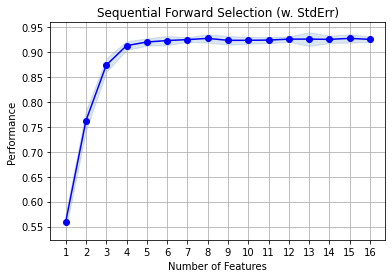

In [7]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Trainmodel with selected features

In [8]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_stat_total, y_stat_DE, test_size= 0.3 , random_state = 42,stratify=y_stat_DE)


#for i in range(1,20):
clf = RandomForestClassifier(random_state=0,max_depth= 9, n_estimators=34)
clf.fit(X_strain, y_strain)
print(clf.score(X_stest,y_stest))

0.9301014656144306


/tmp/ipykernel_269/3986298150.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_strain, y_strain)


use gridsearch to optimize the hyperparameters of model

In [9]:
from sklearn.model_selection import train_test_split

X_train ,X_val,y_train,y_val = train_test_split(X_strain, y_strain,random_state=1,test_size= 0.2)

In [10]:
param_test1 = {"n_estimators":range(30,50,2),"max_depth":range(1,10,1)}
gsearch1 = GridSearchCV(estimator=clf,param_grid=param_test1,cv=10)
gsearch1.fit(X_train, y_train)
print(gsearch1.cv_results_)
print(gsearch1.best_params_) #get the best hyperparameter
print(gsearch1.best_score_)


/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionW

{'mean_fit_time': array([0.0532398 , 0.04579864, 0.0499428 , 0.05138736, 0.05393684,
       0.05644436, 0.06022987, 0.06307411, 0.06552334, 0.06787007,
       0.05318749, 0.05663946, 0.06045403, 0.06320813, 0.06684282,
       0.07181861, 0.07542889, 0.07786627, 0.07995319, 0.08322358,
       0.06269472, 0.06699543, 0.07242792, 0.07431166, 0.07911258,
       0.08152921, 0.08671896, 0.09172482, 0.09435294, 0.09880235,
       0.07076223, 0.07555568, 0.07978182, 0.08372405, 0.08774719,
       0.09268224, 0.09975376, 0.10438564, 0.10693831, 0.11291208,
       0.07861681, 0.08318217, 0.08737221, 0.09245677, 0.09685271,
       0.11385868, 0.13445847, 0.12008898, 0.11928859, 0.12767622,
       0.08600729, 0.0906383 , 0.09609132, 0.10150261, 0.10718479,
       0.11362991, 0.11610272, 0.12448506, 0.12883134, 0.13436928,
       0.08835917, 0.09630947, 0.10053606, 0.10790217, 0.11352801,
       0.11983907, 0.1253957 , 0.12966201, 0.13638248, 0.14100187,
       0.09316003, 0.09975464, 0.10657465, 0

/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


evaluation

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_stest, clf.predict(X_stest)))


              precision    recall  f1-score   support

           2       0.75      0.91      0.82        89
           3       0.88      0.91      0.90        89
           4       0.96      0.89      0.92        89
           5       1.00      1.00      1.00        88
           6       0.89      0.82      0.85        89
           7       1.00      1.00      1.00        88
           8       0.96      0.98      0.97        89
           9       0.96      0.80      0.87        89
          10       0.95      1.00      0.97        89
          11       1.00      1.00      1.00        88

    accuracy                           0.93       887
   macro avg       0.93      0.93      0.93       887
weighted avg       0.93      0.93      0.93       887



In [12]:
print(confusion_matrix(y_stest, clf.predict(X_stest)))

[[81  2  0  0  4  0  0  2  0  0]
 [ 1 81  2  0  0  0  4  1  0  0]
 [ 2  4 79  0  4  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  0  0  0]
 [15  0  1  0 73  0  0  0  0  0]
 [ 0  0  0  0  0 88  0  0  0  0]
 [ 0  2  0  0  0  0 87  0  0  0]
 [ 9  3  0  0  1  0  0 71  5  0]
 [ 0  0  0  0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0  0  0  0 88]]


Get testdata and extract features

In [24]:
List_of_testfiles = proc.get_filelist_from_48k_and_Normal_Data('1730')
Normal_and_48k_data_1730_dict = proc.get_all_matfiles_as_dict_1730(List_of_testfiles)


In [25]:
y_stat_DE1, X_stat_DE1 = proc.get_stat_features_as_df(Normal_and_48k_data_1730_dict,'DE_time')
y_stat_FE1, X_stat_FE1 = proc.get_stat_features_as_df(Normal_and_48k_data_1730_dict,'FE_time')
X_stat_DE1.columns = ['Max_DE','Min_DE','std_DE','var_DE','mean_DE','median_DE','skew_DE','kurt_DE']
X_stat_FE1.columns = ['Max_FE','Min_FE','std_FE','var_FE','mean_FE','median_FE','skew_FE','kurt_fE']
X_stat_total_test = pd.concat([X_stat_DE1,X_stat_FE1],axis = 1)

general predict result,Performance

In [26]:
print(classification_report(y_stat_DE1, clf.predict(X_stat_total_test)))
print(confusion_matrix(y_stat_DE1, clf.predict(X_stat_total_test)))
print(clf.score( X_stat_total_test,y_stat_DE1))

              precision    recall  f1-score   support

           2       0.67      0.69      0.68       300
           3       0.50      0.83      0.62       299
           4       0.96      0.72      0.83       298
           5       1.00      0.97      0.98       300
           6       0.74      0.73      0.73       300
           7       1.00      0.99      0.99       298
           8       0.91      0.95      0.93       300
           9       0.68      0.91      0.78       299
          10       0.97      0.83      0.89       300
          11       0.98      0.37      0.54       298

    accuracy                           0.80      2992
   macro avg       0.84      0.80      0.80      2992
weighted avg       0.84      0.80      0.80      2992

[[208  10   1   0  33   0   0  48   0   0]
 [ 24 247   5   0  10   0   2  11   0   0]
 [ 14   8 216   0  26   0   0  32   0   2]
 [  0   0   0 291   0   0   8   0   1   0]
 [ 62  18   0   0 218   0   0   2   0   0]
 [  0   0   0   0   0 295 

Text(30.5, 0.5, 'true')

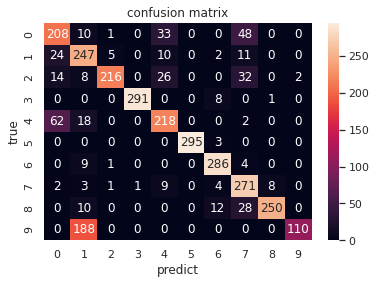

In [18]:
sns.set()
f,ax=plt.subplots()
y_true = y_stat_DE1
y_pred = clf.predict(X_stat_total_test)
C2= confusion_matrix(y_true, y_pred)
sns.heatmap(C2,annot=True,ax=ax,fmt='d') 

ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

Robust check

In [38]:
X_strain_robu, X_stest_robu, y_strain_robu, y_stest_robu = train_test_split(X_stat_total_test, y_stat_DE1, test_size= 0.3 , random_state = 42,stratify=y_stat_DE1)


#for i in range(1,20):
clf1 = RandomForestClassifier(random_state=0,max_depth= 9, n_estimators=42)
clf1.fit(X_strain_robu, y_strain_robu)
print(clf1.score(X_stest_robu,y_stest_robu))

/tmp/ipykernel_269/3126360567.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_strain_robu, y_strain_robu)


0.9532293986636972


In [30]:
X_train_robu ,X_val_robu,y_train_robu,y_val_robu = train_test_split(X_strain_robu, y_strain_robu,random_state=1,test_size= 0.2)
param_test1 = {"n_estimators":range(30,50,2),"max_depth":range(1,10,1)}
gsearch1 = GridSearchCV(estimator=clf1,param_grid=param_test1,cv=10)
gsearch1.fit(X_train_robu, y_train_robu)
print(gsearch1.cv_results_)
print(gsearch1.best_params_) #get the best hyperparameter
print(gsearch1.best_score_)

/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/minghong/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionW

{'mean_fit_time': array([0.05674007, 0.05590239, 0.05937786, 0.06145697, 0.06280251,
       0.06746783, 0.0733444 , 0.07676153, 0.08010733, 0.08188703,
       0.06623504, 0.0670114 , 0.06633945, 0.07059464, 0.07366102,
       0.0774004 , 0.08303995, 0.08766367, 0.09190817, 0.09298646,
       0.0751703 , 0.0836242 , 0.08745873, 0.08782442, 0.09255359,
       0.09928238, 0.10834508, 0.11384401, 0.12113209, 0.12482712,
       0.08954141, 0.09401402, 0.0983624 , 0.10297225, 0.11131244,
       0.11939402, 0.12087066, 0.13030953, 0.13166058, 0.13179862,
       0.09423602, 0.09742138, 0.10301216, 0.11335659, 0.11974385,
       0.12161818, 0.13213603, 0.13105474, 0.13383632, 0.13911734,
       0.09491811, 0.10188739, 0.10577393, 0.12047472, 0.12687318,
       0.13582947, 0.13856118, 0.14455459, 0.15526719, 0.1581877 ,
       0.09655702, 0.10307779, 0.1103277 , 0.12206717, 0.13246713,
       0.13762252, 0.14210322, 0.15836487, 0.17300863, 0.17601526,
       0.11614356, 0.12496004, 0.1273788 , 0

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_stest_robu, clf1.predict(X_stest_robu)))
print(confusion_matrix(y_stest_robu, clf1.predict(X_stest_robu)))


              precision    recall  f1-score   support

           2       0.85      0.89      0.87        90
           3       0.86      0.89      0.87        90
           4       0.95      0.90      0.92        89
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00        90
           7       0.99      1.00      0.99        89
           8       0.99      0.92      0.95        90
           9       0.90      0.93      0.92        90
          10       1.00      1.00      1.00        90
          11       1.00      1.00      1.00        90

    accuracy                           0.95       898
   macro avg       0.95      0.95      0.95       898
weighted avg       0.95      0.95      0.95       898

[[80  6  1  0  0  0  0  3  0  0]
 [ 3 80  2  0  0  0  0  5  0  0]
 [ 8  0 80  0  0  0  0  1  0  0]
 [ 0  0  0 90  0  0  0  0  0  0]
 [ 0  0  0  0 90  0  0  0  0  0]
 [ 0  0  0  0  0 89  0  0  0  0]
 [ 0  6  0  0  0  1 83  0  0  0]
 [ 3  1  1

Robust evaluation

In [37]:
print(classification_report(y_stat_DE, clf1.predict(X_stat_total)))
print(confusion_matrix(y_stat_DE, clf1.predict(X_stat_total)))
print(clf1.score( X_stat_total,y_stat_DE))

              precision    recall  f1-score   support

           2       0.49      0.93      0.64       295
           3       0.82      0.66      0.73       296
           4       0.57      0.95      0.71       296
           5       1.00      1.00      1.00       295
           6       0.00      0.00      0.00       295
           7       1.00      1.00      1.00       295
           8       0.97      0.96      0.96       296
           9       0.38      0.60      0.46       296
          10       1.00      0.04      0.07       298
          11       0.99      1.00      0.99       294

    accuracy                           0.71      2956
   macro avg       0.72      0.71      0.66      2956
weighted avg       0.72      0.71      0.66      2956

[[274  12   6   0   0   0   0   3   0   0]
 [ 32 195  53   1   0   1   7   3   0   4]
 [ 10   4 282   0   0   0   0   0   0   0]
 [  0   0   0 295   0   0   0   0   0   0]
 [157  20 118   0   0   0   0   0   0   0]
 [  0   0   0   0   0 295 

/home/minghong/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/minghong/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/minghong/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(30.5, 0.5, 'true')

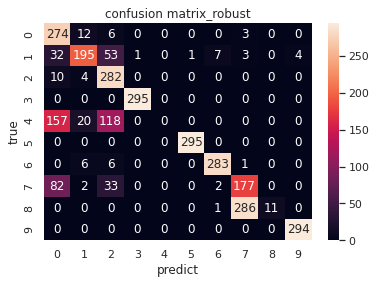

In [41]:
sns.set()
f,ax=plt.subplots()
y_true_1 = y_stat_DE
y_pred_1 = clf1.predict(X_stat_total)
C3=confusion_matrix(y_true_1, y_pred_1)
sns.heatmap(C3,annot=True,ax=ax,fmt='d') 

ax.set_title('confusion matrix_robust') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 